# Importing files needed from the quantum network routing library

In [1]:
%run ./lib/helper.py
%run ./lib/graph.py
%run ./lib/graph_edge_factory.py
%run ./lib/plot.py
%run ./lib/routing_simulation.py
%run ./lib/routing_algorithms.py
%run ./lib/logger.py
%run ./lib/parse_from_log.py
%run ./lib/shortest_path.py

# Running simulations for the initial knowledge approach

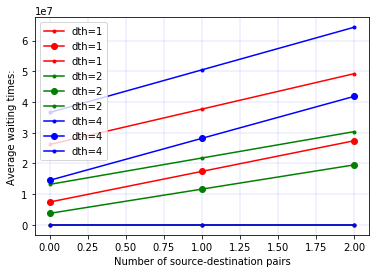

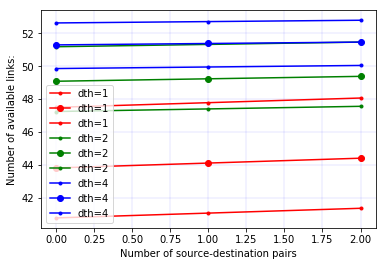

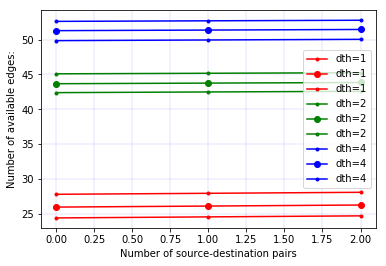

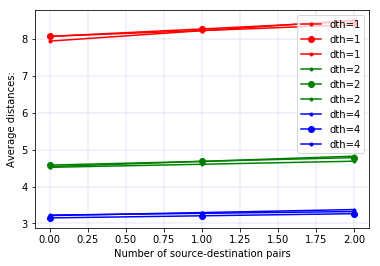

In [2]:
initial_knowledge_results = []
samples = 5
max_dth = 4
start = time.time()
for dth in range(0, 3):
    threshold = 2 ** dth
    factory = VirtualEdgeFactory(distance_threshold=threshold, max_distance_threshold=max_dth)
    graph_edges = factory.generate_deterministic_graph_edges()
    arguments = {'algorithm': initial_knowledge_init, 'graph_edges': graph_edges,
                 'link_prediction': False, 'exponential_scale': True}
    topology_result, length = routing_simulation.run_algorithm_for_graphs(50, samples, arguments)
    initial_knowledge_results.append(topology_result)
end = time.time()
write_results_to_file(initial_knowledge_results, 'initial_knowledge_deterministic_graph_dth_' + str(threshold), '' , (end - start))
plot_results(initial_knowledge_results, 'initial_knowledge_maxdth_' + str(max_dth) + str(end-start),
                  save_tikz = False)

2178.6530735492706


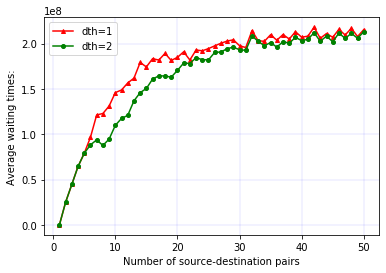

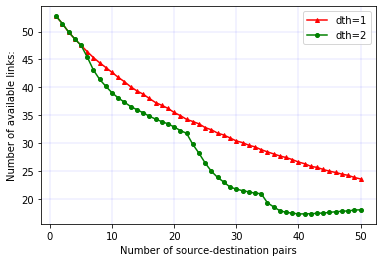

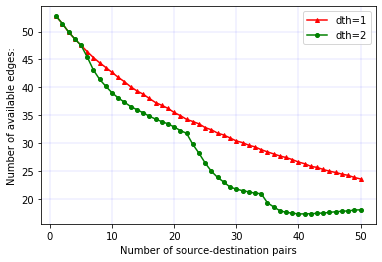

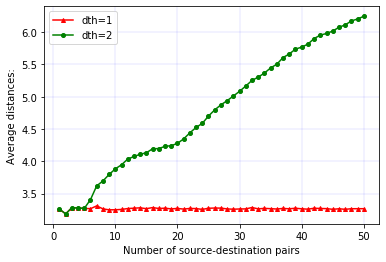

In [8]:
samples = 1000
threshold = 4
max_dth = 4

initial_knowledge_settings = routing_simulation.AlgorithmSettings(algorithm=routing_algorithms.initial_knowledge_init)
initial_knowledge_link_prediction_settings = routing_simulation.AlgorithmSettings(algorithm=
                                                                        routing_algorithms.initial_knowledge_init,
                                                                        link_prediction=True)

algorithm_settings = [initial_knowledge_settings, initial_knowledge_link_prediction_settings]
simulation_settings = routing_simulation.SimulationSettings(number_of_samples=samples)

factory = graph_edge_factory.VirtualEdgeFactory(distance_threshold=threshold, max_distance_threshold=max_dth)
graph_edges = factory.generate_deterministic_graph_edges()

topology_settings = routing_simulation.TopologySettings(graph_edges=graph_edges, distance_threshold=threshold)

simulation = routing_simulation.Simulation(simulation_settings, topology_settings, algorithm_settings)

start = time.time()
simulation.run_algorithm_for_graphs()
end = time.time()
print(end-start)
plot_results(list(simulation.final_results.values()), '_maxdth_'
                      + str(max_dth) + str(end - start), save_tikz=False)

In [9]:
plot_results(list(simulation.final_results.values()), '_maxdth_'
                      + str(max_dth) + str(end - start), save_tikz=True)

<Figure size 432x288 with 0 Axes>

In [4]:
print(end-start)

189.18019723892212


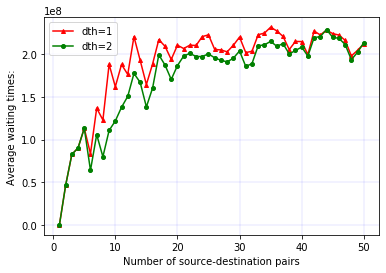

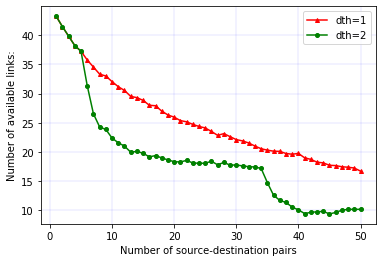

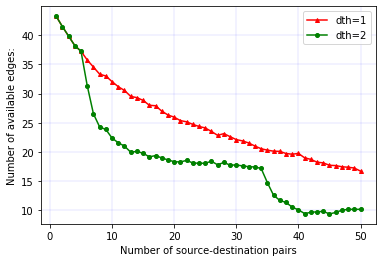

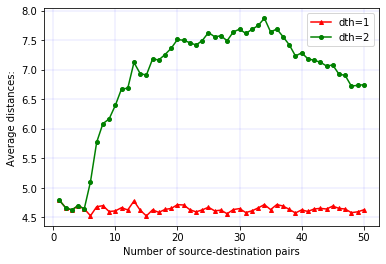

In [3]:
plot_results(list(simulation.final_results.values()), '_maxdth_'
                      + str(max_dth) + str(end - start), save_tikz=False)

In [2]:
samples = 5
threshold = 4
max_dth = 4
algorithms = [routing_algorithms.initial_knowledge_init]
algorithm_names = [algo.__name__ for algo in algorithms]

simulation_settings = routing_simulation.SimulationSettings(algorithms=algorithms, number_of_samples=samples,
                                                                link_prediction=True)

factory = graph_edge_factory.VirtualEdgeFactory(distance_threshold=threshold, max_distance_threshold=max_dth)
graph_edges = factory.generate_deterministic_graph_edges()

topology_settings = routing_simulation.TopologySettings(graph_edges=graph_edges, distance_threshold=threshold)

simulation = routing_simulation.Simulation(simulation_settings, topology_settings)

start = time.time()
simulation.run_algorithm_for_graphs()
end = time.time()
print(end-start)

43.078028440475464


{'initial_knowledge_init': ([2.654, 14809589.2555, 20694662.27466667, 28727727.071, 23434797.799, 28125001.677666664, 46470253.40471429, 42637383.715125, 51253448.18877778, 59664026.6635, 59633737.46763637, 63016220.603416674, 72779433.79869229, 77995376.04578571, 81526878.37946667, 92167879.524625, 86699940.25488235, 95531653.69377777, 85308195.2863158, 95608837.34189999, 103188135.06485713, 108816052.29627272, 110460537.27691305, 115287763.15175, 107127697.46944, 112793833.6541154, 118786480.18796296, 126797542.6552857, 125168918.01096551, 127230941.47236668, 130572256.01503228, 137944622.52890626, 134665593.74948484, 131893579.83529413, 149688380.02402857, 140375354.3988333, 136867977.44245946, 148668670.2729737, 151058628.32671794, 143692727.178625, 147036962.87512195, 146894038.98814285, 149765195.74227905, 152743943.77220452, 150902364.78582224, 152028262.16997823, 151907422.65172338, 156640593.2466875, 156831512.11834696, 163670370.97094], [61.346, 60.1485, 58.913666666666664, 5

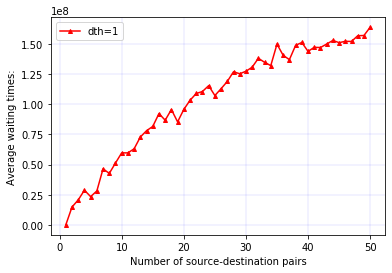

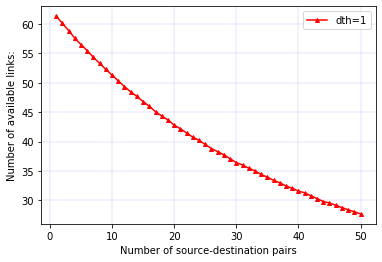

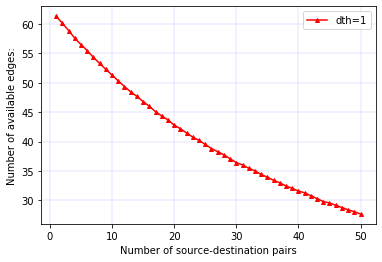

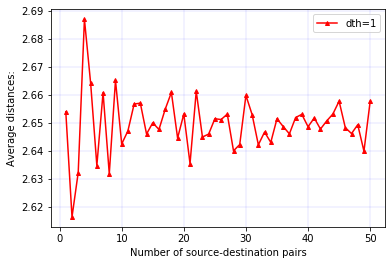

In [3]:
print(simulation.final_results)
for algo_name in algorithm_names:
    plot_results([simulation.final_results[algo_name]], 'initial_knowledge_maxdth_'
                      + str(max_dth) + str(end - start), save_tikz=False)

In [4]:
print(end-start)

3837.050314426422


# Running simulations for the initial knowledge approach with link prediction

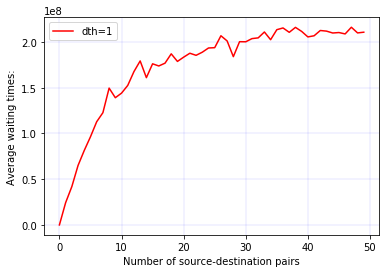

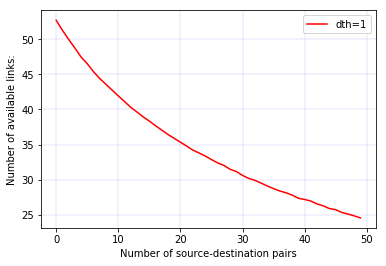

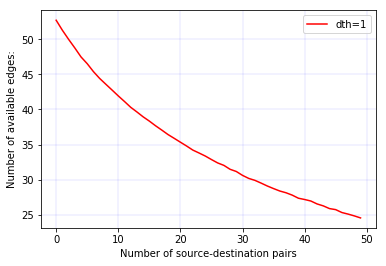

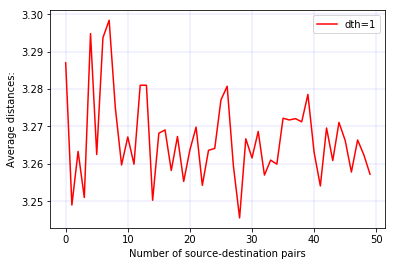

In [23]:
initial_knowledge_results = []
samples = 1000
max_dth = 4
start = time.time()
threshold = 2 ** 2
factory = VirtualEdgeFactory(distance_threshold=threshold, max_distance_threshold=max_dth)
graph_edges = factory.generate_deterministic_graph_edges()
arguments = {'algorithm': initial_knowledge_init, 'graph_edges': graph_edges,
             'link_prediction': True, 'exponential_scale': True}
topology_result, length = routing_simulation.run_algorithm_for_graphs(50, samples, arguments)
initial_knowledge_results.append(topology_result)
end = time.time()
write_results_to_file(initial_knowledge_results, 'initial_knowledge_link_prediction_betweenness_centrality_maxdth_' + str(max_dth), '' , (end - start))
plot_results(initial_knowledge_results, 'initial_knowledge_link_prediction_betweenness_centrality_maxdth_' + str(max_dth) + str(end-start),
                  save_tikz = False)

In [24]:
# Most recent 07_03 results on link prediction dth4
prev_initial_knowledge_results = [([3.187, 25376924.8295, 23695952.327333335, 57674897.82725, 72384375.88379999, 88317787.81816667, 70425871.3912857, 78056792.641875, 76390065.40522222, 90180026.344, 104042818.007, 110021227.99466667, 122756573.75792308, 136445689.6432857, 126032261.54453333, 138839791.1431875, 134772758.20517644, 147303376.3501111, 156565465.3101053, 155198448.41725, 161736190.55885714, 164731321.38468182, 174656713.75134784, 168891720.3729583, 173298523.19079998, 176778737.55376923, 172333419.8165926, 183219566.69789284, 185609445.2279655, 184161867.3931667, 183222634.41370967, 183803216.34790626, 185682307.01684847, 184380434.25164706, 193770106.10477144, 189642704.54333335, 199815018.07678378, 202146639.2880263, 194805185.0677436, 191339625.66219997, 192111090.84731704, 196032791.94583336, 200077693.70360464, 204043323.92138636, 203215318.2411778, 199245062.39484784, 197644217.53885108, 202992645.32439584, 198243193.4680408, 198229256.15730003], [52.813, 51.174, 49.70166666666667, 48.34525, 47.006, 45.78866666666667, 44.301, 42.732, 41.2, 39.8725, 38.452636363636366, 37.094583333333325, 35.86369230769231, 34.55264285714286, 33.42353333333334, 32.41025, 31.320647058823532, 30.34, 29.434736842105263, 28.607800000000005, 27.801571428571428, 26.927409090909087, 26.066739130434783, 25.450666666666663, 24.720519999999997, 23.919192307692306, 23.107296296296294, 22.467, 21.6991724137931, 21.0258, 20.345870967741934, 19.81478125, 19.189333333333334, 18.637558823529414, 18.264342857142857, 17.764333333333333, 17.287513513513513, 16.829052631578946, 16.41858974358974, 15.960974999999998, 15.651853658536586, 15.271809523809525, 14.846139534883722, 14.584545454545454, 14.199066666666667, 13.908369565217392, 13.64659574468085, 13.389, 13.158061224489797, 12.8322], [52.813, 51.174, 49.70166666666667, 48.34525, 47.006, 45.78866666666667, 44.301, 42.732, 41.2, 39.8725, 38.452636363636366, 37.094583333333325, 35.86369230769231, 34.55264285714286, 33.42353333333334, 32.41025, 31.320647058823532, 30.34, 29.434736842105263, 28.607800000000005, 27.801571428571428, 26.927409090909087, 26.066739130434783, 25.450666666666663, 24.720519999999997, 23.919192307692306, 23.107296296296294, 22.467, 21.6991724137931, 21.0258, 20.345870967741934, 19.81478125, 19.189333333333334, 18.637558823529414, 18.264342857142857, 17.764333333333333, 17.287513513513513, 16.829052631578946, 16.41858974358974, 15.960974999999998, 15.651853658536586, 15.271809523809525, 14.846139534883722, 14.584545454545454, 14.199066666666667, 13.908369565217392, 13.64659574468085, 13.389, 13.158061224489797, 12.8322], [3.187, 3.3175, 3.353666666666667, 3.36525, 3.3786, 3.421833333333333, 3.626857142857143, 3.808375, 3.9943333333333335, 4.1055, 4.225727272727272, 4.370583333333333, 4.463846153846155, 4.577, 4.674533333333333, 4.7421875, 4.787588235294117, 4.858444444444444, 4.932578947368421, 4.965199999999999, 5.012619047619046, 5.0555, 5.082521739130435, 5.102791666666667, 5.286479999999999, 5.479269230769231, 5.5932962962962955, 5.7310357142857145, 5.815310344827587, 5.915566666666667, 5.988, 6.06296875, 6.14590909090909, 6.167117647058824, 6.248600000000001, 6.320666666666666, 6.394081081081081, 6.463026315789473, 6.500358974358974, 6.563825, 6.552463414634147, 6.6052857142857135, 6.6752558139534885, 6.731931818181818, 6.732044444444445, 6.7745, 6.810829787234042, 6.8475, 6.870367346938776, 6.891799999999999])]
print(initial_knowledge_results)


[([3.287, 24306481.656, 41885556.498, 64973475.667, 81384272.51479998, 96344722.8075, 112762055.92528571, 122641085.051375, 149506842.64222223, 139015218.83470002, 144018021.15754545, 152450203.8703333, 167571809.72476923, 179200880.90728572, 160927682.2616667, 176073308.7880625, 173699678.53729412, 176758694.3885, 186961504.9146842, 178672975.92134997, 183332354.67238098, 187620465.17095453, 185346707.6347826, 188740477.86483333, 193355401.96559998, 193696112.08834612, 206717764.05688888, 201054838.0987143, 183880234.46103448, 200233975.1289667, 200150438.29329032, 203600491.00990626, 204416952.03618184, 210835313.55508825, 202401283.52974287, 213363120.83866668, 215251195.8918919, 210479736.85842106, 215890978.02089742, 211462469.5992, 205461918.55412194, 206703428.22709525, 212468293.78011626, 211788312.3913409, 209735463.83997777, 210238216.27823913, 208724432.33191487, 216028338.2633125, 209820666.77430615, 210618575.02552003], [52.713, 51.288, 49.995333333333335, 48.7685, 47.4862

In [28]:
prev_initial_knowledge_results_lat = prev_initial_knowledge_results[0]
initial_knowledge_results_lat = initial_knowledge_results[0]
plot_results([prev_initial_knowledge_results_lat, initial_knowledge_results_lat], 'initial_knowledge_link_prediction_betweenness_centrality_maxdth_' + str(max_dth) + str(end-start),
                  save_tikz = False)

<Figure size 432x288 with 0 Axes>

In [30]:
print(prev_initial_knowledge_results_lat[0])

[3.187, 25376924.8295, 23695952.327333335, 57674897.82725, 72384375.88379999, 88317787.81816667, 70425871.3912857, 78056792.641875, 76390065.40522222, 90180026.344, 104042818.007, 110021227.99466667, 122756573.75792308, 136445689.6432857, 126032261.54453333, 138839791.1431875, 134772758.20517644, 147303376.3501111, 156565465.3101053, 155198448.41725, 161736190.55885714, 164731321.38468182, 174656713.75134784, 168891720.3729583, 173298523.19079998, 176778737.55376923, 172333419.8165926, 183219566.69789284, 185609445.2279655, 184161867.3931667, 183222634.41370967, 183803216.34790626, 185682307.01684847, 184380434.25164706, 193770106.10477144, 189642704.54333335, 199815018.07678378, 202146639.2880263, 194805185.0677436, 191339625.66219997, 192111090.84731704, 196032791.94583336, 200077693.70360464, 204043323.92138636, 203215318.2411778, 199245062.39484784, 197644217.53885108, 202992645.32439584, 198243193.4680408, 198229256.15730003]


In [4]:
prev_results = [3.174, 9396662.533, 27279415.591, 30377658.55725, 33972222.5766, 42784361.9725, 53903897.01485715, 72868449.5385, 82129426.49822223, 100592418.2225, 123486774.04381818, 116053342.86525, 127676800.29038462, 128053217.98464285, 136389725.2744, 137250175.7606875, 150400639.02847058, 139828789.4186111, 152152622.3239474, 155780064.27115002, 160904304.41319048, 163175233.3700909, 167332644.79782608, 169492352.83375, 166378388.7694, 176015612.9471923, 179462560.45362964, 184459027.9214643, 177513680.18079308, 178047651.79356664]

In [16]:
print(len(prev_results))

30


In [12]:
plot_results([(prev_results,),(initial_knowledge_results[0][0],)], 'initial_knowledge_link_prediction_betweenness_centrality_maxdth_' + str(max_dth) + str(end-start),
                  save_tikz = True)

IndexError: tuple index out of range

<Figure size 432x288 with 0 Axes>

In [6]:
print(end-start)

179.22769951820374


In [10]:
print(initial_knowledge_results)

[([3.218, 15092513.255, 26145732.894, 51908264.0395, 75584519.32540001, 78043405.32933334, 69001044.71542858, 69245251.9945, 92437378.95544444, 96509181.29689999, 102589261.22063637, 105460626.31166665, 120667185.14376922, 121741683.984, 136225773.8962, 147085033.1468125, 145756504.89182356, 154671135.3618889, 161149202.74063158, 153990492.88975, 167559721.4112381, 160132462.77990907, 164867106.45769566, 177395948.041125, 175713642.85108003, 177648637.03234616, 176238158.14240742, 177647778.33025, 180805488.74024135, 183920232.5182], [52.782, 51.204, 49.813333333333325, 48.367, 47.0346, 45.82333333333334, 44.33828571428571, 42.565625, 41.275888888888886, 39.866899999999994, 38.404636363636364, 37.115916666666664, 35.81546153846155, 34.68514285714286, 33.516, 32.36525, 31.295411764705886, 30.382611111111114, 29.52478947368421, 28.46445, 27.837714285714288, 27.062363636363635, 26.19369565217391, 25.32904166666667, 24.61436, 23.937923076923077, 23.12481481481482, 22.45796428571429, 21.708

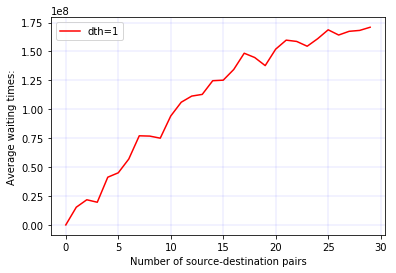

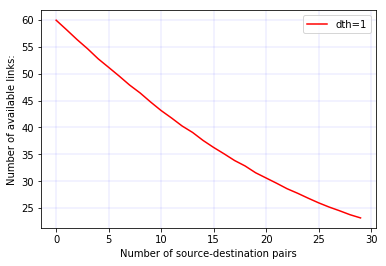

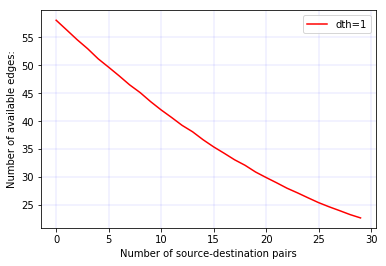

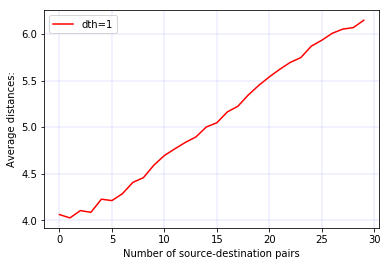

In [31]:
initial_knowledge_results = []
samples = 1000
start = time.time()
threshold = 4
factory = graph_edge_factory.VirtualEdgeFactory(distance_threshold=threshold)
graph_edges = factory.generate_random_power_law_graph_edges()
arguments = {'algorithm': initial_knowledge_init, 'graph_edges': graph_edges,
             'link_prediction': True, 'exponential_scale': True}
topology_result, length = routing_simulation.run_algorithm_for_graphs(30, samples, arguments)
initial_knowledge_results.append(topology_result)
end = time.time()
write_results_to_file(initial_knowledge_results, 'initial_knowledge_random_link_prediction_betweenness_centrality_dth_' + str(threshold), '' , (end - start))
plot_results(initial_knowledge_results, 'initial_knowledge_random_link_prediction_betweenness_centrality_dth_' + str(threshold) + str(end-start),
                  save_tikz = False)

In [32]:
print(initial_knowledge_results)

[([4.062, 15319229.8535, 21746372.045333337, 19608197.96425, 41249048.1938, 45059718.41866666, 56947828.012428574, 77052227.2315, 76800549.34577778, 74999738.3187, 94178574.98263636, 106096666.122, 111394282.56969231, 112852759.71707141, 124680741.69366665, 125151388.0259375, 134370781.80611765, 148446871.92777777, 144741250.40263158, 137745220.2777, 151988960.69280955, 159761699.91922727, 158644759.1837826, 154496205.97666666, 161008313.21947998, 168696048.83980772, 164190631.38603705, 167400093.12242857, 168174170.70996553, 170916432.06006667], [59.938, 58.1525, 56.325, 54.622, 52.768600000000006, 51.17333333333333, 49.55985714285715, 47.877125, 46.410444444444444, 44.7254, 43.13909090909091, 41.74641666666666, 40.26653846153845, 39.06485714285714, 37.57626666666666, 36.2794375, 35.09064705882352, 33.84538888888889, 32.83510526315789, 31.57235, 30.597, 29.623, 28.600956521739132, 27.760291666666664, 26.84924, 25.97926923076923, 25.195148148148146, 24.502928571428573, 23.764, 23.16933